### MSDS 422 Sec.55 Summer 2020 
#### Joshua Sudderth

#### Assignment 4 - Advanced Housing Prices Kaggle Competition

In [1]:
# Initiate First Libraries

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import os


##### In this section, We will import the data and begin EDA on the data set

In [2]:
# Import CSV
datapath = os.path
train = pd.read_csv("train.csv", thousands=',')
test = pd.read_csv("test.csv", thousands=',')

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [4]:
# Look at first 5 lines of the dataframe
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


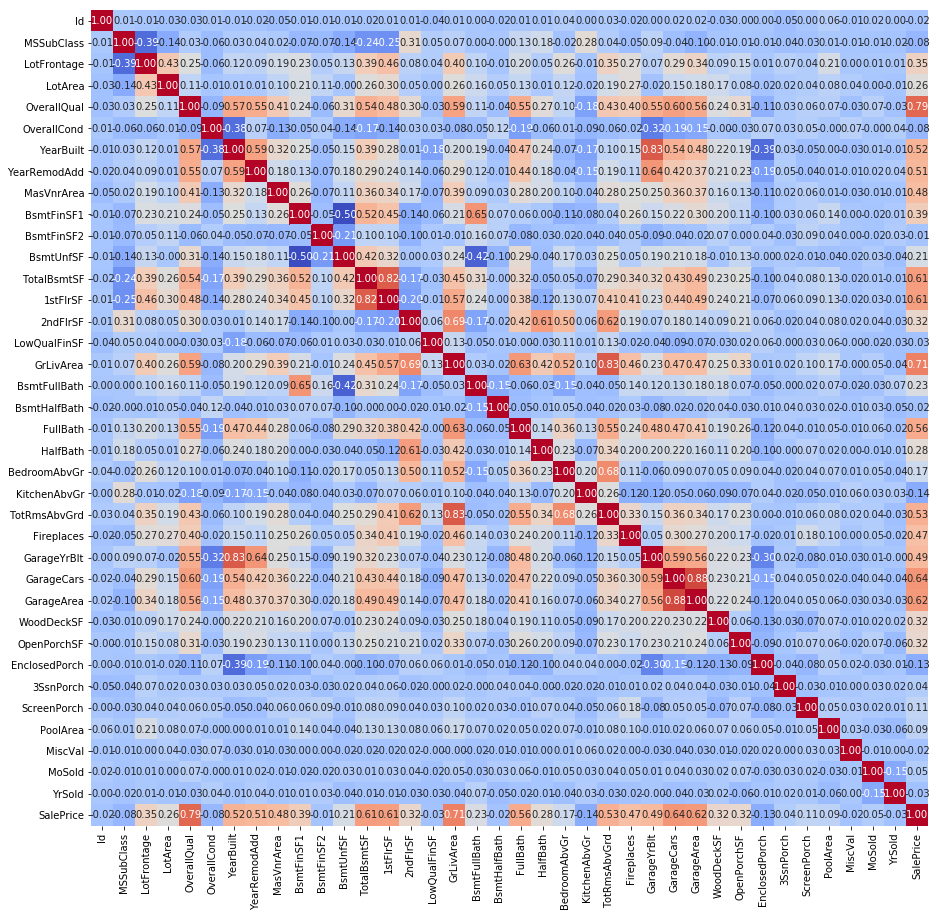

In [6]:
# create correlation plot to look for variables that
#    could potentially be eliminated

train_correlation = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(train_correlation, annot=True,fmt='.2f',cmap='coolwarm',cbar=False)
plt.show()

In [7]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
# Create two new variables from EDA done below to incorporate into merged data frame.

train['LogSalePrice'] = np.log(train['SalePrice'])


#### Remove outliers from previous EDA. EDA work below, this is done here for managing data dimensions

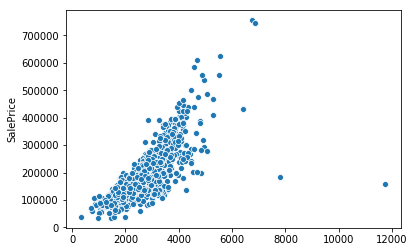

In [9]:
sns.scatterplot((train['GrLivArea']+train['TotalBsmtSF']),train['SalePrice'])

In [10]:
# drop large homes that sell less than 200,000
train = train.drop(train[((train['TotalBsmtSF']+train['GrLivArea']) > 4500) & (train['SalePrice']<250000)].index)

In [11]:
# CREATE TARGET VARIABLES (SalePrice and LogSalePrice) AND REMOVE FROM TRAIN

y = train['SalePrice'].reset_index(drop=True)
y_log = train['LogSalePrice'].reset_index(drop=True)
train_prep= train.drop(['SalePrice', 'LogSalePrice'], axis=1)

test_prep = test

In [12]:
# Merging frames

merged = pd.concat([train_prep, test_prep]).reset_index(drop=True)
print(merged.shape)

(2914, 80)


In [13]:
# This was a variable I used in MSDS 410 in the previous quarter
merged['TotalSF'] = merged['TotalBsmtSF']+merged['GrLivArea']

The correlation plot above shows some interesting correlations to "SalePrice". These correlations could be useful for selecting variables for our model. This can inform what variables to spend time on.

Some of the highly correlated variables are highly correlated themselves. For example, GarageYrBlt is highly correlated to YearBuilt. OverallQual has correlation to numerous variables.

In [14]:
# Get counts of variables with missing values

merged_na = merged.isnull().sum()
merged_na = merged_na[merged_na>0]
merged_na.sort_values(ascending=False)

PoolQC          2905
MiscFeature     2809
Alley           2717
Fence           2344
FireplaceQu     1419
LotFrontage      485
GarageCond       157
GarageQual       157
GarageFinish     157
GarageYrBlt      157
GarageType       155
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        23
MasVnrArea        22
MSZoning           4
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
Exterior1st        1
Exterior2nd        1
TotalSF            1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

In [15]:
# Create table of missing values

count = merged.isnull().sum().sort_values(ascending=False)
percent = (merged.isnull().sum()/merged.isnull().count()).sort_values(ascending=False)
merged_missing = pd.concat([count, percent], axis=1, keys=['Count', 'Percent'])
merged_missing.head(30)

,Count,Percent
PoolQC,2905,0.996911
MiscFeature,2809,0.963967
Alley,2717,0.932395
Fence,2344,0.804393
FireplaceQu,1419,0.486960
LotFrontage,485,0.166438
GarageCond,157,0.053878
GarageYrBlt,157,0.053878
GarageFinish,157,0.053878
GarageQual,157,0.053878


Based on the NaN search above, we do have issues with missing data. Categorical variables will likely be replaced with 'None' to prep for dummy variable creation. Numeric (continuous or otherwise), will be turned to zero or possibly imputed.

Text(0.5, 1.0, 'SalePrice')

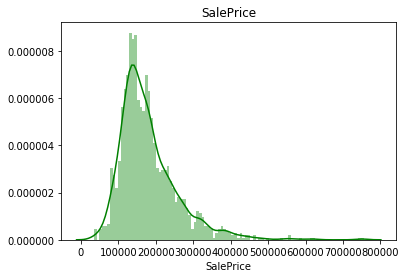

In [16]:
# Look at distribution of SalePrice - Must use "Train" dataframe for this
#    as saleprice does not exist in merged dataframe
sns.distplot(train["SalePrice"], color='g', bins=100).set_title("SalePrice")

Text(0.5, 1.0, 'LogSalePrice')

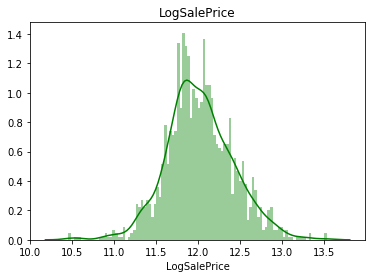

In [17]:
# Look at distribution of LogSalePrice - Must use "Train" dataframe for this
#    as saleprice does not exist in merged dataframe

# Again, this is a variable I used in MSDS 410 in the previous quarter

sns.distplot(train["LogSalePrice"], color='g', bins=100).set_title("LogSalePrice")

Text(0.5, 1.0, 'GrLivArea')

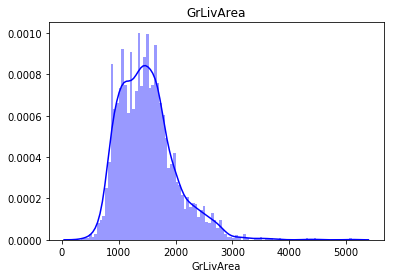

In [18]:
sns.distplot(merged["GrLivArea"], color='b', bins=100).set_title("GrLivArea")

{'whiskers': [<matplotlib.lines.Line2D at 0x2232aa5bcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2232aa62320>,
 'boxes': [<matplotlib.lines.Line2D at 0x2232aa5b908>],
 'medians': [<matplotlib.lines.Line2D at 0x2232aa629b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2232aa62cf8>],
 'means': []}

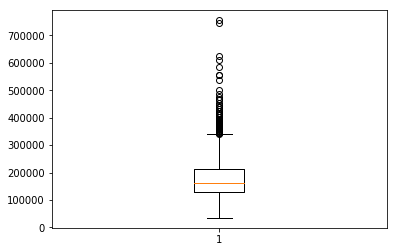

In [19]:
# Outlier check

plt.boxplot(train["SalePrice"])

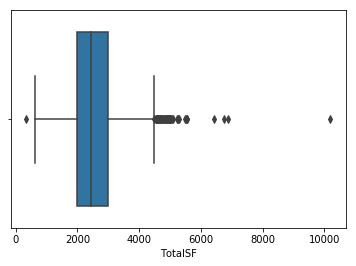

In [20]:
sns.boxplot(merged['TotalSF'])

In [21]:
merged['TotalSF'].describe()

count     2913.000000
mean      2545.579815
std        778.925974
min        334.000000
25%       2004.000000
50%       2452.000000
75%       2993.000000
max      10190.000000
Name: TotalSF, dtype: float64

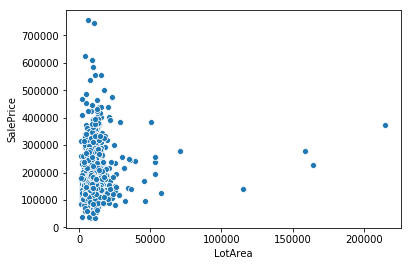

In [22]:
sns.scatterplot(merged['LotArea'],train['SalePrice'])

In [23]:
#merged = merged.drop(merged[(merged['LotFrontage'] > 22694)].index)
                             

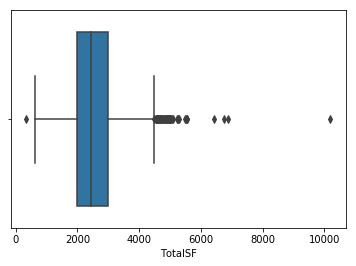

In [24]:
sns.boxplot(merged['TotalSF'])

In [25]:
train['SalePrice'].describe()

count      1455.000000
mean     180892.832990
std       79572.111703
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

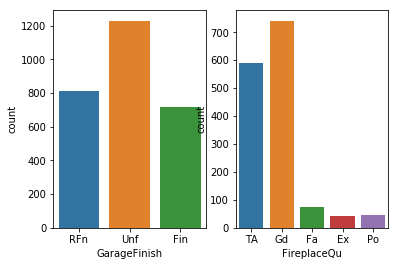

In [26]:
fig, ax =plt.subplots(1,2)
sns.countplot(merged['GarageFinish'], ax=ax[0])
sns.countplot(merged['FireplaceQu'], ax=ax[1])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

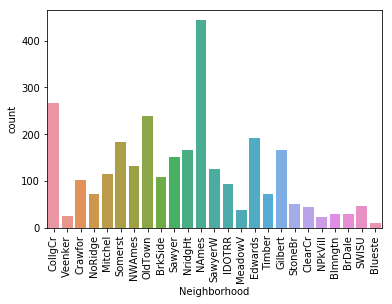

In [27]:
sns.countplot(merged['Neighborhood'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

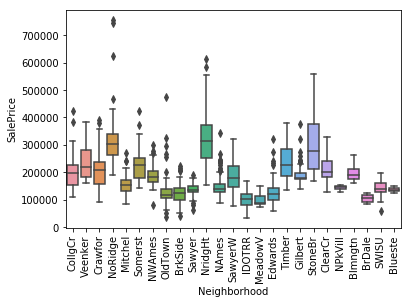

In [28]:
sns.boxplot(train['Neighborhood'],train['SalePrice'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

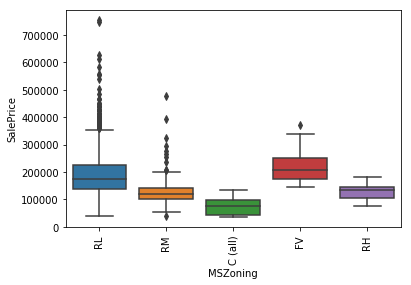

In [29]:
sns.boxplot(train['MSZoning'],train['SalePrice'])
plt.xticks(rotation=90)

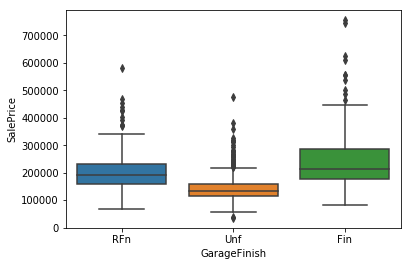

In [30]:
sns.boxplot(train['GarageFinish'],train['SalePrice'])


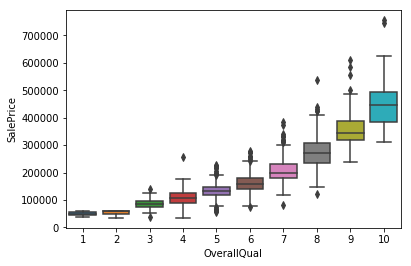

In [31]:
sns.boxplot(train['OverallQual'],train['SalePrice'])


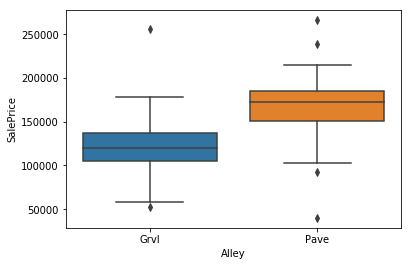

In [32]:
sns.boxplot(train['Alley'],train['SalePrice'])

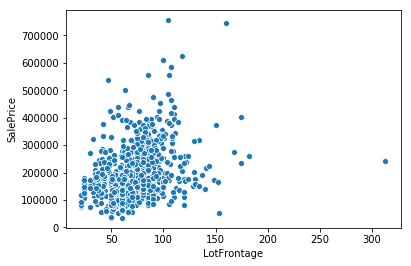

In [33]:
sns.scatterplot(train['LotFrontage'],train['SalePrice'])

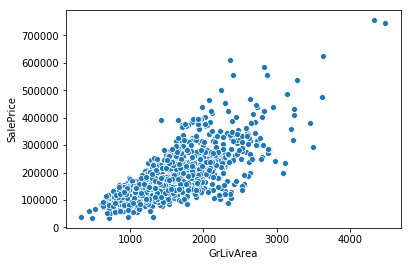

In [34]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])

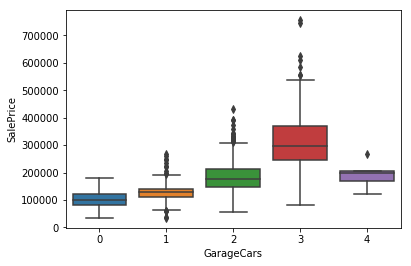

In [35]:
sns.boxplot(train['GarageCars'],train['SalePrice'])

#### The LOG of SalePrice does appear to fix the normality issues with the target value.

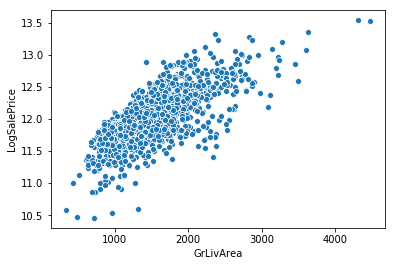

In [36]:
sns.scatterplot(train['GrLivArea'],train['LogSalePrice'])

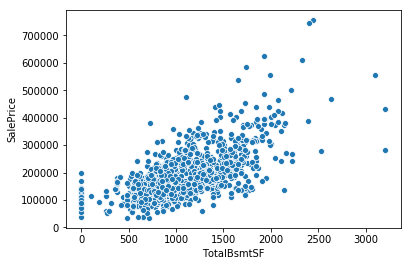

In [37]:
sns.scatterplot(train['TotalBsmtSF'],train['SalePrice'])

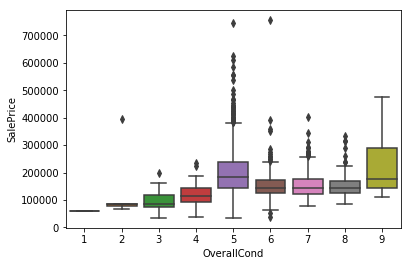

In [38]:
sns.boxplot(train['OverallCond'],train['SalePrice'])

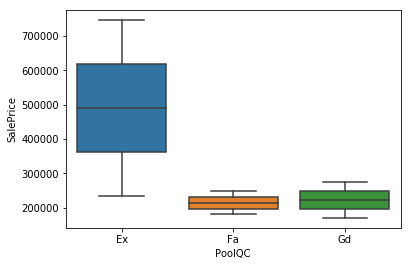

In [39]:
sns.boxplot(train['PoolQC'],train['SalePrice'])

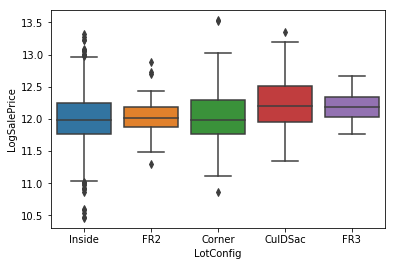

In [40]:
sns.boxplot(train['LotConfig'],train['LogSalePrice'])

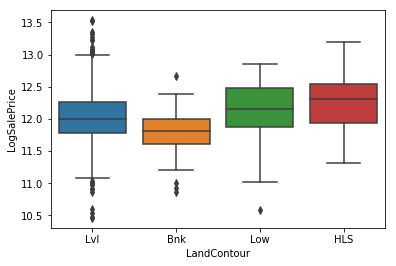

In [41]:
sns.boxplot(train['LandContour'],train['LogSalePrice'])

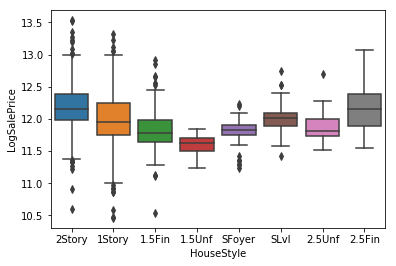

In [42]:
sns.boxplot(train['HouseStyle'],train['LogSalePrice'])

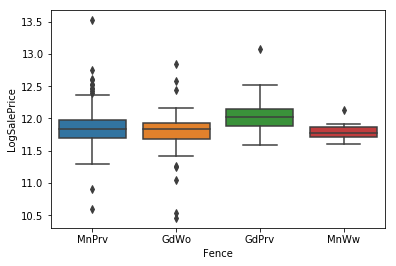

In [43]:
sns.boxplot(train['Fence'],train['LogSalePrice'])

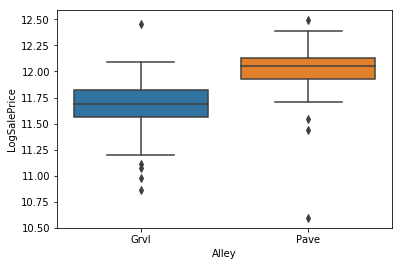

In [44]:
sns.boxplot(train['Alley'],train['LogSalePrice'])

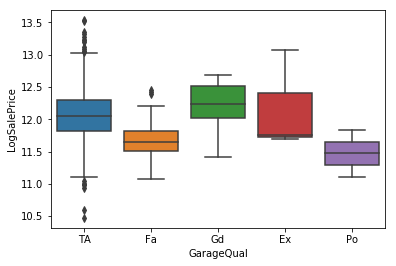

In [45]:
sns.boxplot(train['GarageQual'],train['LogSalePrice'])

In [46]:
#merged['TotalSF']=merged["TotalSF"]<4500

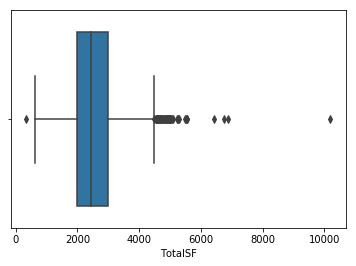

In [47]:
sns.boxplot(merged['TotalSF'])

In [48]:
# Create Drop List - The variables were selected from the correlation
#   matrix. Any less than 0.10 with SalePrice are removed as well as any that are
#   parts of new variable TotalSF

drop_list = ['Id','MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 
            'MoSold', 'YrSold','PoolArea', 'GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'Functional',
             'LandContour','LotConfig','GrLivArea', 'KitchenAbvGr','Fence', 'TotalBsmtSF']

merged.drop(drop_list, axis=1, inplace=True)


In [49]:
merged.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,MiscFeature,MiscVal,SaleType,SaleCondition,TotalSF
0,RL,65.0,8450,Pave,NaN,Reg,AllPub,Gtl,CollgCr,Norm,...,61,0,0,0,NaN,NaN,0,WD,Normal,2566.0
1,RL,80.0,9600,Pave,NaN,Reg,AllPub,Gtl,Veenker,Feedr,...,0,0,0,0,NaN,NaN,0,WD,Normal,2524.0
2,RL,68.0,11250,Pave,NaN,IR1,AllPub,Gtl,CollgCr,Norm,...,42,0,0,0,NaN,NaN,0,WD,Normal,2706.0
3,RL,60.0,9550,Pave,NaN,IR1,AllPub,Gtl,Crawfor,Norm,...,35,272,0,0,NaN,NaN,0,WD,Abnorml,2473.0
4,RL,84.0,14260,Pave,NaN,IR1,AllPub,Gtl,NoRidge,Norm,...,84,0,0,0,NaN,NaN,0,WD,Normal,3343.0


In [50]:
# Create list of "object" columns

obj_cols = list(merged.select_dtypes(['object']).columns)
obj_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'Utilities',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [51]:
# Missing Categorical Values to be changed to 'None'
# Rather than imputing values, the base assumption will be None 
#    for categorical variables

for col in [obj_cols]:
    merged[col] = merged[col].fillna('None')


In [52]:
# Create variable of column variable types
#    Used for Filling NAs and Scaling non-categorical variables

num__cols = list(merged.select_dtypes(['int64','float64']).columns)
num__cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'TotalSF']

In [53]:
# Now change missing numeric values to 0

for col in [num__cols]:
    merged[col] = merged[col].fillna(0)

In [54]:
# Check to see that no missing values remain

merged_na = merged.isnull().sum()
merged_na = merged_na[merged_na>0]
merged_na.sort_values(ascending=False)

Series([], dtype: int64)

In [55]:
# create dummy variables for raw_train df
#  Use drop first to drop one dummy from each category

merged_d = pd.get_dummies(merged, drop_first = True)

In [56]:
merged_d.head(20)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706.0,150.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978.0,284.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486.0,434.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216.0,540.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655.0,490.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5,85.0,14115,5,1993,1995,0.0,732.0,64.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
6,75.0,10084,8,2004,2005,186.0,1369.0,317.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
7,0.0,10382,7,1973,1973,240.0,859.0,216.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
8,51.0,6120,7,1931,1950,0.0,0.0,952.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
9,50.0,7420,5,1939,1950,0.0,851.0,140.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
# import scaler functions form sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

In [58]:
# scale all numeric data and create new dataframe with scaled variables

merged_ds = merged_d

merged_ds[num__cols] = MinMaxScaler().fit_transform(merged_ds[num__cols])

In [59]:
merged_ds.head(20)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.207668,0.033420,0.666667,0.949275,0.883333,0.12250,0.176060,0.064212,0.333333,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0.255591,0.038795,0.555556,0.753623,0.433333,0.00000,0.243890,0.121575,0.000000,0.5,...,0,0,0,0,1,0,0,0,1,0
2,0.217252,0.046507,0.666667,0.934783,0.866667,0.10125,0.121197,0.185788,0.333333,0.0,...,0,0,0,0,1,0,0,0,1,0
3,0.191693,0.038561,0.666667,0.311594,0.333333,0.00000,0.053865,0.231164,0.333333,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.268371,0.060576,0.777778,0.927536,0.833333,0.21875,0.163342,0.209760,0.333333,0.0,...,0,0,0,0,1,0,0,0,1,0
5,0.271565,0.059899,0.444444,0.876812,0.750000,0.00000,0.182544,0.027397,0.333333,0.0,...,0,0,0,0,1,0,0,0,1,0
6,0.239617,0.041057,0.777778,0.956522,0.916667,0.11625,0.341397,0.135702,0.333333,0.0,...,0,0,0,0,1,0,0,0,1,0
7,0.000000,0.042450,0.666667,0.731884,0.383333,0.15000,0.214214,0.092466,0.333333,0.0,...,0,0,0,0,1,0,0,0,1,0
8,0.162939,0.022529,0.666667,0.427536,0.000000,0.00000,0.000000,0.407534,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
9,0.159744,0.028605,0.444444,0.485507,0.000000,0.00000,0.212219,0.059932,0.333333,0.0,...,0,0,0,0,1,0,0,0,1,0


In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(merged_ds.dtypes)

LotFrontage              float64
LotArea                  float64
OverallQual              float64
YearBuilt                float64
YearRemodAdd             float64
MasVnrArea               float64
BsmtFinSF1               float64
BsmtUnfSF                float64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                 float64
HalfBath                 float64
BedroomAbvGr             float64
TotRmsAbvGrd             float64
Fireplaces               float64
GarageCars               float64
GarageArea               float64
WoodDeckSF               float64
OpenPorchSF              float64
EnclosedPorch            float64
3SsnPorch                float64
ScreenPorch              float64
MiscVal                  float64
TotalSF                  float64
MSZoning_FV                uint8
MSZoning_None              uint8
MSZoning_RH                uint8
MSZoning_RL                uint8
MSZoning_RM                uint8
Street_Pave                uint8
Alley_None

### SPLIT DATA SET BACK TO TRAIN AND TEST 



In [61]:
# Split merged dataframe back into train and test.
#  This method was learned from a kaggle notebook by "Shay Guterman"

train = merged_ds.iloc[:len(y), :]
test = merged_ds.iloc[len(y):, :]

In [62]:
print(['Train Shape: ',train.shape,'Target shape: ', y.shape,'Test shape: ', test.shape])

['Train Shape: ', (1455, 236), 'Target shape: ', (1455,), 'Test shape: ', (1459, 236)]


###  RIDGE REGRESSION with cross validation 

In [63]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import timeit


In [64]:
ridge_alpha = [0.00005, 0.001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20 ]

In [65]:
def ridgeCrossVal():
    scores_RR = []
    for alpha in ridge_alpha:
        ridge_reg = Ridge(alpha=alpha, solver = 'cholesky')
        rr_scores = cross_val_score(ridge_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        rr_rmse_score = np.sqrt(-rr_scores).mean()
        
        # get accuracy of train, test and the MAE, MSE and RMSE
        

        
        scores_RR.append([alpha, rr_rmse_score])
        
    
    return scores_RR

In [66]:
def plotRMSE(data):
    data = pd.DataFrame(data, columns = ['Alpha', 'RMSE'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    # plot alpha perfor with RMSE
    sns.barplot(data.Alpha, data.RMSE, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Alpha and RMSE')
    

    sns.lineplot(x='Alpha', y='RMSE', data = data, ax=axarr[1], markers = True).set_title("Cross Validation Alpha and RMSE")
    
    display(plt.show())

    display(data)
    

Ridge Regression Cross Validation


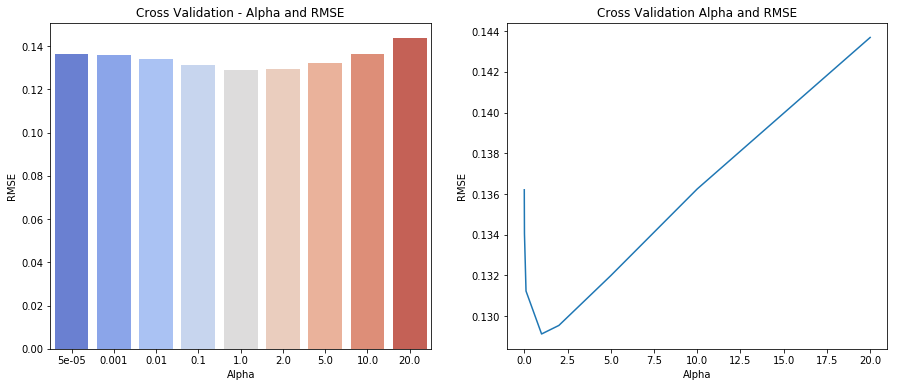

None

,Alpha,RMSE
0,0.00005,0.136208
1,0.00100,0.135813
2,0.00100,0.135813
3,0.01000,0.134057
4,0.10000,0.131232
5,1.00000,0.129124
6,2.00000,0.129543
7,5.00000,0.131989
8,10.00000,0.136249
9,20.00000,0.143692


t\Completed.... Runtime = 0.540372399999999


In [67]:
print('Ridge Regression Cross Validation')
start = timeit.default_timer()

scores_RR = ridgeCrossVal()
ridgeResults = plotRMSE(scores_RR)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

### Lasso with Cross-Validation Loop

In [68]:
lasso_alpha = [0.000025, 0.00005, 0.001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20 ]

In [69]:
def lassoCrossVal():
    scores_lasso = []
    for alpha in lasso_alpha:
        lasso_reg = Lasso(alpha=alpha)
        lasso_scores = cross_val_score(lasso_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        lasso_rmse_score = np.sqrt(-lasso_scores).mean()
        
        # get accuracy of train, test and the MAE, MSE and RMSE
        

        
        scores_lasso.append([alpha, lasso_rmse_score])
        
    
    return scores_lasso

Lasso Cross Validation


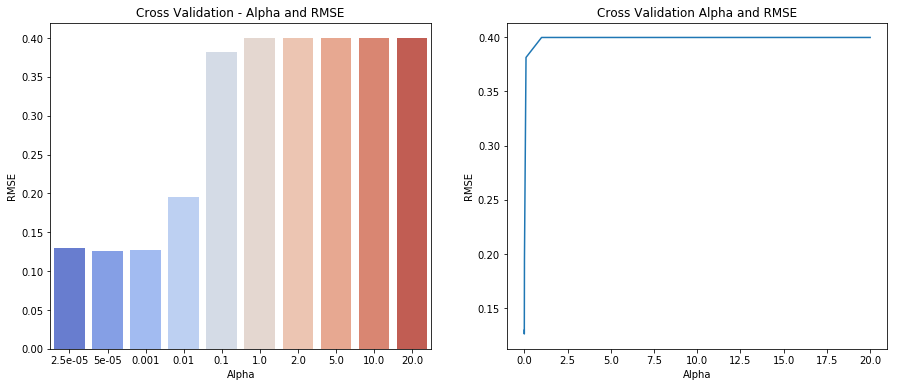

None

,Alpha,RMSE
0,0.000025,0.129830
1,0.000050,0.126364
2,0.001000,0.127720
3,0.001000,0.127720
4,0.010000,0.195055
5,0.100000,0.381380
6,1.000000,0.399814
7,2.000000,0.399814
8,5.000000,0.399814
9,10.000000,0.399814


t\Completed.... Runtime = 1.2257883000000014


In [70]:
print('Lasso Cross Validation')
start = timeit.default_timer()

scores_lasso = lassoCrossVal()
LassoResults = plotRMSE(scores_lasso)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

### Elastic Net RMSE

In [71]:
elastic_alpha = [0.000025, 0.00005, 0.001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20]


In [72]:
def elasticCrossVal():
    scores_elastic = []
    for alpha in elastic_alpha:
        elastic_reg = ElasticNet(alpha=alpha, l1_ratio = 0.6)
        elastic_scores = cross_val_score(elastic_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        elastic_rmse_score = np.sqrt(-elastic_scores).mean()
        
        # get accuracy of train, test and the MAE, MSE and RMSE
        

        
        scores_elastic.append([alpha, elastic_rmse_score])
        
    
    return scores_elastic

Elastic Cross Validation


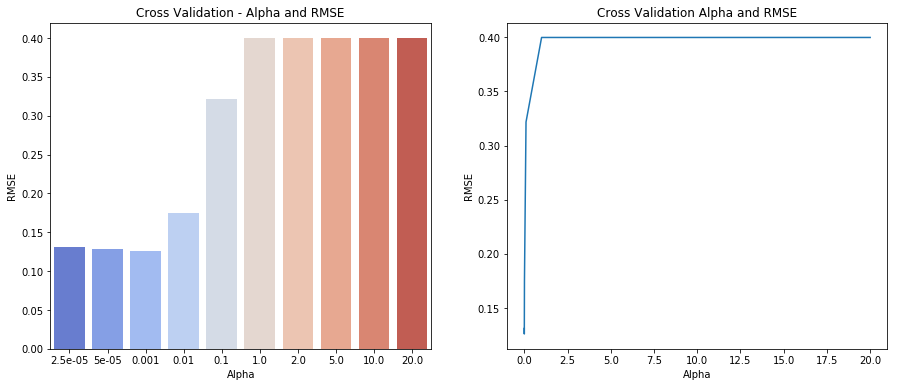

None

,Alpha,RMSE
0,0.000025,0.131106
1,0.000050,0.128453
2,0.001000,0.126034
3,0.001000,0.126034
4,0.010000,0.174854
5,0.100000,0.321752
6,1.000000,0.399814
7,2.000000,0.399814
8,5.000000,0.399814
9,10.000000,0.399814


t\Completed.... Runtime = 1.2588237999999983


In [73]:
print('Elastic Cross Validation')
start = timeit.default_timer()

scores_elastic = elasticCrossVal()
elasticResults = plotRMSE(scores_elastic)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

### Random Forest Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
features = [2,3,4,5,6, 7, 8, 9, 10, 11, 12, 14, 16,18,20, 25, 35, 40, 45,50,100,200]

In [76]:
# create a loop to evaluate the effect of differnet max_features - 100 trees

def RF_reg_feature():
    scores_RF_feat = []
    for max_feat in features:
        RF_reg = RandomForestRegressor(n_estimators=200, bootstrap = True, random_state =42, 
                                       max_features = max_feat, n_jobs=-1)
        RF_scores = cross_val_score(RF_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        RF_rmse_score = np.sqrt(-RF_scores).mean()
        
        # get accuracy of train, test and the MAE, MSE and RMSE
        

        
        scores_RF_feat.append([max_feat, RF_rmse_score])
        
    
    return scores_RF_feat

In [77]:
def plotRF_RMSE(data):
    data = pd.DataFrame(data, columns = ['MaxFeatures', 'RMSE'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    # plot alpha perfor with RMSE
    sns.barplot(data.MaxFeatures, data.RMSE, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Max Features and RMSE')
    

    sns.lineplot(x='MaxFeatures', y='RMSE', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Max Features and RMSE")
    
    display(plt.show())

    data.head(25)

Random Forest Cross Validation on Max Features


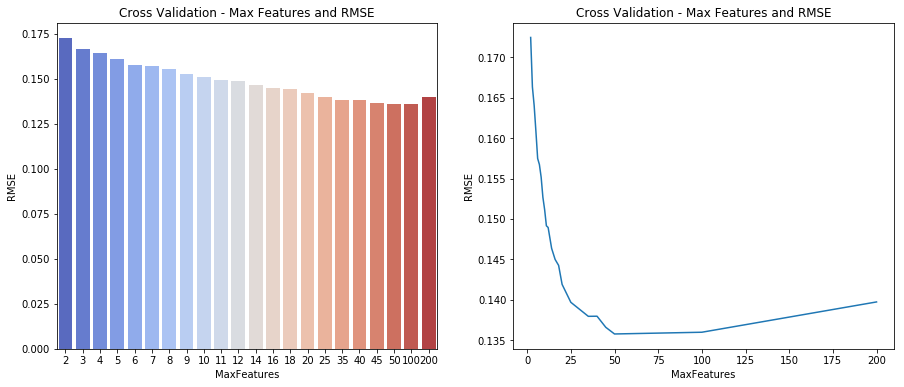

None

t\Completed.... Runtime = 48.200619


In [78]:
print('Random Forest Cross Validation on Max Features')
start = timeit.default_timer()

scores_RF_feat = RF_reg_feature()
RFResults = plotRF_RMSE(scores_RF_feat)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

In [79]:
trees = [10,20,40,60,100,200, 300]

In [80]:
# create a loop to evaluate the effect of different numbers of trees  - 60 max features

def RF_reg_Trees():
    scores_RF_Trees = []
    for tree in trees:
        RF_reg = RandomForestRegressor(n_estimators = tree, bootstrap = True, random_state =42, 
                                       max_features = 'log2')
        RF_scores = cross_val_score(RF_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        RF_rmse_score = np.sqrt(-RF_scores).mean()
        
        scores_RF_Trees.append([tree, RF_rmse_score])
        
    
    return scores_RF_Trees

In [81]:
def plotRF_RMSE_Trees(data):
    
    data = pd.DataFrame(data, columns = ['Trees', 'RMSE'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Trees, data.RMSE, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Trees and RMSE')
    

    sns.lineplot(x='Trees', y='RMSE', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Trees and RMSE")
    
    display(plt.show())

    data.head(25)

Random Forest Cross Validation on Trees and with max features = 60


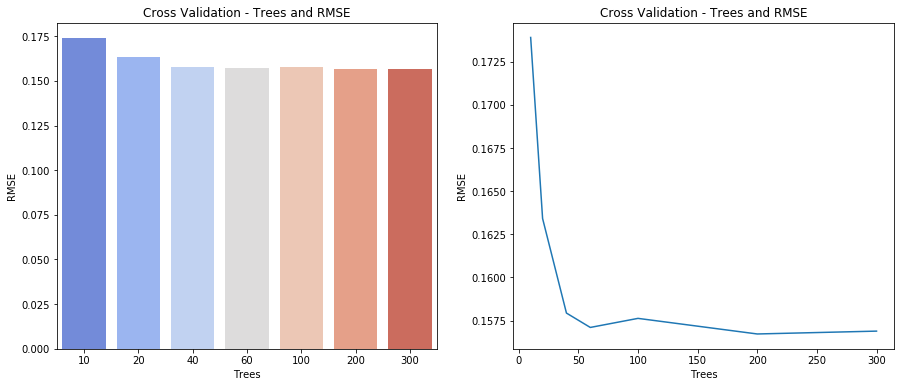

None

t\Completed.... Runtime = 5.2559811


In [82]:
print('Random Forest Cross Validation on Trees and with max features = 60')
start = timeit.default_timer()

scores_RF_Trees = RF_reg_Trees()
RF_Trees_Results = plotRF_RMSE_Trees(scores_RF_Trees)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

In [83]:
max_depth = [1,5,10,15,20]

In [84]:
# create a loop to evaluate the effect of differnet max_depth - 100 trees and 60 features

def RF_reg_Depth():
    scores_RF_Depth = []
    for depth in max_depth:
        RF_reg = RandomForestRegressor(n_estimators = 200, bootstrap = True, random_state =42, 
                                       max_features = 100, max_depth = depth)
        RF_scores = cross_val_score(RF_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        RF_rmse_score = np.sqrt(-RF_scores).mean()
        
        scores_RF_Depth.append([depth, RF_rmse_score])
        
    
    return scores_RF_Depth

In [85]:
def plotRF_RMSE_Depth(data):
    
    data = pd.DataFrame(data, columns = ['MaxDepth', 'RMSE'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.MaxDepth, data.RMSE, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Max Depth and RMSE')
    

    sns.lineplot(x='MaxDepth', y='RMSE', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Max Depth and RMSE")
    
    display(plt.show())

    data.head(25)

Random Forest Cross Validation on Max Depth, 100 trees and max 60 features


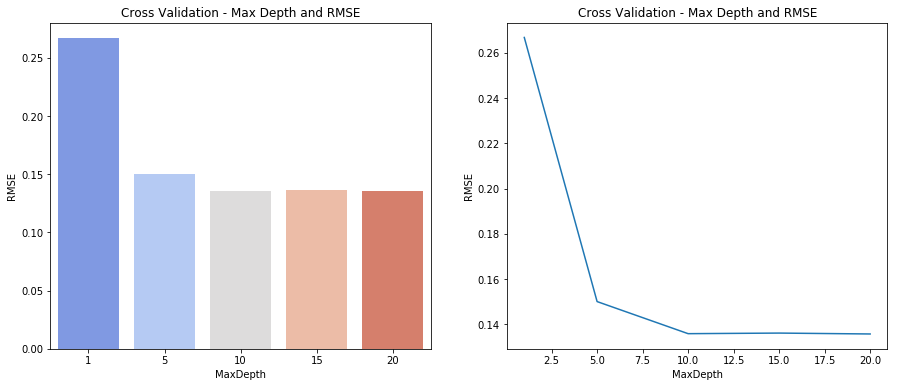

None

t\Completed.... Runtime = 19.8567403


In [86]:
print('Random Forest Cross Validation on Max Depth, 100 trees and max 60 features')
start = timeit.default_timer()

scores_RF_Depth = RF_reg_Depth()
RF_Depth_Results = plotRF_RMSE_Depth(scores_RF_Depth)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

### Let's compare manual tuning to Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV

RF_reg = RandomForestRegressor(n_jobs = -1)
RF_params = { 
    'n_estimators': [10, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(2,20,2)
}

gs_random = GridSearchCV(estimator=RF_reg, param_grid=RF_params, cv= 5)


In [88]:
print('Random Forest Cross Validation Grid Search')

start = timeit.default_timer()
gs_random.fit(train, y_log)
print(gs_random.best_params_)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

Random Forest Cross Validation Grid Search
{'max_depth': 18, 'max_features': 'auto', 'n_estimators': 200}
t\Completed.... Runtime = 93.67111150000001


### Below is Grid Search suggested model

In [89]:
RF_reg_test = RandomForestRegressor(n_estimators=200, bootstrap = True, random_state =42, 
                                       max_features = 'auto', max_depth = 14)
RF_scores_test = cross_val_score(RF_reg_test, train, y_log, scoring = "neg_mean_squared_error", cv=5)
RF_rmse_score = np.sqrt(-RF_scores_test).mean()
print("RMSE 5 fold cross val score based on Grid Search Suggested model = {}".format(RF_rmse_score))

RMSE 5 fold cross val score based on Grid Search Suggested model = 0.14128140880569773


### Below is model based on manual efforts

In [90]:
RF_reg_manual = RandomForestRegressor(n_estimators=200, bootstrap = True, random_state =42, 
                                       max_features = 100)
RF_scores_manual = cross_val_score(RF_reg_manual, train, y_log, scoring = "neg_mean_squared_error", cv=5)
RF_rmse_score_man = np.sqrt(-RF_scores_manual).mean()
print("RMSE 5 fold cross val score based on manual adjustments = {}".format(RF_rmse_score_man))

RMSE 5 fold cross val score based on manual adjustments = 0.1359756526264335


## Boosting

### Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
GB_estimators= [1,5,10,15,20,40,60,80,100,200]

In [93]:
# create a loop to evaluate the effect of differnet estimators

def GB_reg_est():
    scores_GB_est = []
    for est in GB_estimators:
        GB_reg = GradientBoostingRegressor(n_estimators = est, learning_rate =0.1)
        GB_scores = cross_val_score(GB_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        GB_rmse_score = np.sqrt(-GB_scores).mean()
        
        scores_GB_est.append([est, GB_rmse_score])
        
    
    return scores_GB_est

In [94]:
def plotGB_RMSE_est(data):
    
    data = pd.DataFrame(data, columns = ['Estimators', 'RMSE'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Estimators, data.RMSE, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Estimators and RMSE')
    

    sns.lineplot(x='Estimators', y='RMSE', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Estimators and RMSE")
    
    display(plt.show())

    data.head(25)

Gradient Boosting Cross Validation on estimators


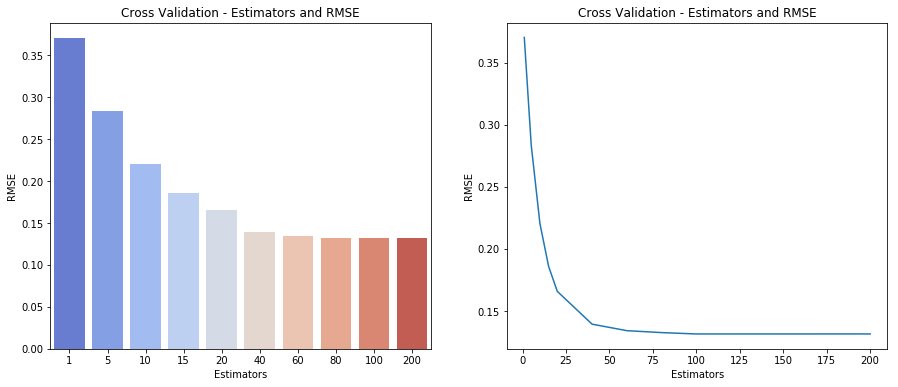

None

t\Completed.... Runtime = 12.021311300000008


In [95]:
print('Gradient Boosting Cross Validation on estimators')
start = timeit.default_timer()

scores_GB_est = GB_reg_est()
GB_est_Results = plotGB_RMSE_est(scores_GB_est)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

In [96]:
GB_reg = GradientBoostingRegressor(n_estimators = 80, learning_rate =0.1)
gb_scores = cross_val_score(GB_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
gb_rmse_score = np.sqrt(-gb_scores).mean()
        
print("Gradient Boost 5 fold cross val score  = {}".format(gb_rmse_score))

Gradient Boost 5 fold cross val score  = 0.1328782303986941


### XG Boost

In [97]:
import xgboost

In [98]:
xgb_reg = xgboost.XGBRegressor()

In [99]:
xgb_scores = cross_val_score(xgb_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
xgb_rmse_score = np.sqrt(-xgb_scores).mean()
        
print("XGB 5 fold cross val score  = {}".format(xgb_rmse_score))

[13:55:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\jlsud\anaconda3\envs\NWU2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jlsud\anaconda3\envs\NWU2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\jlsud\anaconda3\envs\NWU2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\jlsud\anaconda3\envs\NWU2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\jlsud\anaconda3\envs\NWU2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB 5 fold cross val score  = 0.1329583810866526


### Blended

In [100]:
# Set up regressors with selected hyper parameters

ridge_reg_final = Ridge(alpha=1, solver = 'cholesky')
lasso_reg_final = Lasso(alpha=0.00005)
elastic_reg_final = ElasticNet(alpha=0.001, l1_ratio = 0.6)
RF_reg_final = RandomForestRegressor(n_estimators=200, bootstrap = True, random_state =42, 
                                       max_features = 'log2')
GB_reg_final = GradientBoostingRegressor(n_estimators = 80, learning_rate =0.1)
xgb_reg = xgboost.XGBRegressor()

#set up RMSE calc
def rmse(y_log, y_pred):
    return np.sqrt(mean_squared_error(y_log, y_pred))



In [101]:
# Fit models with selected hyper parameters
ridge_final_model = ridge_reg_final.fit(train, y_log)
lasso_final_model = lasso_reg_final.fit(train, y_log)
elastic_final_model = elastic_reg_final.fit(train, y_log)
RF_final_model = RF_reg_final.fit(train, y_log)
GB_final_model = GB_reg_final.fit(train, y_log)
xgb_final_model= xgb_reg.fit(train, y_log)


C:\Users\jlsud\anaconda3\envs\NWU2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [102]:
#Define Model Blending Function

def blend_models_predict(X):
    return((0.20*ridge_reg_final.predict(X)) + \
           (0.10*lasso_reg_final.predict(X)) + \
           (0.10*elastic_reg_final.predict(X)) + \
           (0.20*RF_reg_final.predict(X)) + \
           (0.20*GB_reg_final.predict(X)) + \
           (0.20*xgb_reg.predict(X)))

In [103]:
print('RMSE score on train data:')
print(rmse(y_log, blend_models_predict(train)))

RMSE score on train data:
0.08418695614826913


## Create submissions

#### Ridge Regression Submission

In [104]:
# Ridge Regression Submission
ridge_pred = np.exp(ridge_reg_final.predict(test))
ridge_test_final = pd.read_csv("test.csv", thousands=',')
print(['Ridge Test Final Shape: ',ridge_test_final.shape])

['Ridge Test Final Shape: ', (1459, 80)]


In [105]:
ridge_test_final = ridge_test_final[['Id']]
ridge_test_final['SalePrice']= ridge_pred
ridge_test_final.head()

,Id,SalePrice
0,1461,121383.141218
1,1462,154166.994478
2,1463,178884.014510
3,1464,198828.355798
4,1465,199078.451917


In [106]:
ridge_test_final.to_csv('solutions_ridge.csv', index=False)

#### Random Forest Regression Submission

In [107]:
# Random Forest Regression Submission
RF_pred = np.exp(RF_reg_final.predict(test))
RF_test_final = pd.read_csv("test.csv", thousands=',')
print(['Random Forest Test Final Shape: ',RF_test_final.shape])

['Random Forest Test Final Shape: ', (1459, 80)]


In [108]:
RF_test_final = RF_test_final[['Id']]
RF_test_final['SalePrice']= RF_pred
RF_test_final.head()

,Id,SalePrice
0,1461,125651.627101
1,1462,152782.552793
2,1463,184748.610998
3,1464,193937.201606
4,1465,189433.186496


In [109]:
RF_test_final.to_csv('solutions_RF.csv', index=False)

#### Blended Submission

In [110]:
# Blended Model Submission
blend_pred = np.exp(blend_models_predict(test))
blend_test_final = pd.read_csv("test.csv", thousands=',')
print(['Blended Model Test Final Shape: ',blend_test_final.shape])

['Blended Model Test Final Shape: ', (1459, 80)]


In [111]:
blend_test_final = blend_test_final[['Id']]
blend_test_final['SalePrice']= blend_pred
blend_test_final.head()

,Id,SalePrice
0,1461,120403.207333
1,1462,157195.372147
2,1463,183194.622059
3,1464,193067.935588
4,1465,194748.707636


In [112]:
blend_test_final.to_csv('solutions_blend_3.csv', index=False)

## Support Vector Regression

In [113]:
from sklearn.svm import SVR

In [114]:
SVR_epsilons=[0.0005, 0.005,0.05,0.1,1]

In [115]:
# create a loop to evaluate the effect of differnet estimators

def SVR_reg_est():
    scores_SVR_est = []
    for eps in SVR_epsilons:
        SVR_reg = SVR(C= 20, epsilon= eps, gamma=0.0003)
        SVR_scores = cross_val_score(SVR_reg, train, y_log, scoring = "neg_mean_squared_error", cv=5)
 
        SVR_rmse_score = np.sqrt(-SVR_scores).mean()
        
        scores_SVR_est.append([eps, SVR_rmse_score])
        
    
    return scores_SVR_est

In [116]:
def plotSVR_RMSE_est(data):
    
    data = pd.DataFrame(data, columns = ['Epsilon', 'RMSE'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Epsilon, data.RMSE, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Epsilon and RMSE')
    

    sns.lineplot(x='Epsilon', y='RMSE', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Epsilon and RMSE")
    
    display(plt.show())

    data.head(25)

SVR Cross Validation on epsilon


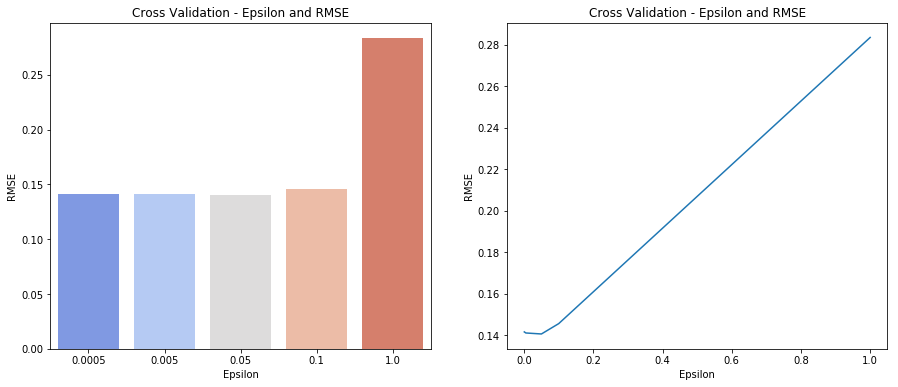

None

t\Completed.... Runtime = 4.806768900000009


In [117]:
print('SVR Cross Validation on epsilon')
start = timeit.default_timer()

scores_SVR_est = SVR_reg_est()
SVR_est_Results = plotSVR_RMSE_est(scores_SVR_est)

stop = timeit.default_timer()

print('t\Completed.... Runtime = {}'.format(stop-start))

### Stacked Model

In [118]:
from mlxtend.regressor import StackingCVRegressor

In [119]:
stack_reg = StackingCVRegressor(regressors=(ridge_reg_final, lasso_reg_final, elastic_reg_final,
                                              RF_reg_final, GB_reg_final, xgb_reg),
                                meta_regressor=xgb_reg,
                                use_features_in_secondary=True)

In [120]:
# Stacked Regression Submission
stack_model = stack_reg.fit(np.array(train), np.array(y_log))
stack_pred_train = np.exp(stack_model.predict(np.array(train)))



[13:56:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:56:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [121]:
def blend_models_2_predict(X):
    return((0.10*ridge_reg_final.predict(X)) + \
           (0.10*lasso_reg_final.predict(X)) + \
           (0.10*elastic_reg_final.predict(X)) + \
           (0.10*RF_reg_final.predict(X)) + \
           (0.10*GB_reg_final.predict(X)) + \
           (0.10*xgb_reg.predict(X)) + \
           (0.40*stack_model.predict(np.array(X))))
        

In [122]:
print('RMSE score on train data:')
print(rmse(y_log, blend_models_2_predict(train)))

RMSE score on train data:
0.08173155585046257


In [123]:
blend_2_pred = np.exp(blend_models_2_predict(test))
blend_2_test_final = pd.read_csv("test.csv", thousands=',')
print(['Blended Model with Stacked Regressor Final Shape: ',blend_test_final.shape])

['Blended Model with Stacked Regressor Final Shape: ', (1459, 2)]


In [124]:
blend_2_test_final = blend_2_test_final[['Id']]
blend_2_test_final['SalePrice']= blend_2_pred
blend_2_test_final.head()

,Id,SalePrice
0,1461,119437.984025
1,1462,157226.889382
2,1463,185414.771410
3,1464,197424.733630
4,1465,192508.322057


In [125]:
blend_2_test_final.to_csv('solutions_blend_stack.csv', index=False)

In [126]:
blended_train = np.exp(blend_models_predict(train))

In [127]:
# Create dataframe of Blended Model Regression predicitons vs actual for plotting
blended_pred = pd.DataFrame({"prediction":blended_train , "actual":y})
blended_pred["resids"] = blended_pred["actual"] - blended_pred['prediction']

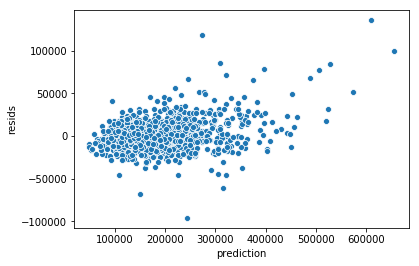

In [128]:
# Scatterplot of Blended Model Residuals vs Predicted - Train df
sns.scatterplot(blended_pred['prediction'],blended_pred["resids"])

In [129]:
blended_pred['resids'].describe()

count      1455.000000
mean       1706.412152
std       15451.464932
min      -96184.577386
25%       -6327.050927
50%         791.492856
75%        8139.287205
max      135550.725028
Name: resids, dtype: float64